In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aggregated-week-max/aggregated_week_max.csv


In [2]:
!pip install autots==0.5.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.1 MB/s eta 0:00:00a 0:00:01


In [3]:
import pandas as pd
import numpy as np
from autots import AutoTS

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Load data
df = pd.read_csv("/kaggle/input/aggregated-week-max/aggregated_week_max.csv")
df['Date Time'] = pd.to_datetime(df['Date Time'])

AutoTS library handles pre-processing and scaling internally, the workflow is much simpler. Also, AutoTS handles evaluation metrics internally. 

In [5]:
#train test split
train = df.iloc[:828]
train['Date Time'] = pd.to_datetime(train['Date Time'] )
test = df.iloc[828:]
test['Date Time'] = pd.to_datetime(test['Date Time'] )
print(len(train))
print(len(test))

828
60


In [7]:
# Create model

model = AutoTS(forecast_length=60,
               frequency='infer',
               ensemble='simple',
               model_list='superfast',
               drop_data_older_than_periods=480)

In [8]:
# Fit model
model = model.fit(train, date_col='Date Time', value_col='Tpot (K)', id_col=None)

Inferred frequency is: W-SUN
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model GLS in generation 0 of 10
Model Number: 5 with model GLS in generation 0 of 10
Model Number: 6 with model LastValueNaive in generation 0 of 10
Model Number: 7 with model LastValueNaive in generation 0 of 10
Model Number: 8 with model LastValueNaive in generation 0 of 10
Model Number: 9 with model LastValueNaive in generation 0 of 10
Model Number: 10 with model SeasonalNaive in generation 0 of 10
Model Number: 11 with model SeasonalNaive in generation 0 of 10
Model Number: 12 with model SeasonalNaive in generation 0 of 10
Model Number: 13 with model ConstantNaive in generation 0 of 10
Model Number: 14 with model SeasonalNaive in generation 0 of 10
Model Number: 15 with model Seasonal

In [44]:
print(model.best_model.ModelParameters)

300    {"model_name": "BestN", "model_count": 3, "mod...
Name: ModelParameters, dtype: object


In [35]:
# Get predictions
prediction = model.predict()

Prediction object: 
Return .forecast, 
 .upper_forecast, 
 .lower_forecast 
 .model_parameters 
 .transformation_parameters

In [38]:
forecast_df = pd.DataFrame()
forecast_df = prediction.forecast
forecast_df['yhat_lower'] = prediction.lower_forecast
forecast_df['yhat_upper'] = prediction.upper_forecast
forecast_df.columns = ['yhat','yhat_lower','yhat_upper']
forecast_df.head(20)

,yhat,yhat_lower,yhat_upper
2019-11-17,287.029442,280.780433,294.437398
2019-11-24,286.307573,279.398029,291.982794
2019-12-01,285.636550,278.422594,291.038312
2019-12-08,301.785606,296.005582,307.230255
2019-12-15,297.053534,287.908273,305.237336
2019-12-22,286.554123,278.216587,292.567148
2019-12-29,285.755803,279.616689,292.169611
2020-01-05,296.038817,286.773275,304.905640
2020-01-12,302.747227,298.495256,308.228477
2020-01-19,285.936140,277.644595,291.522209


In [49]:
# Creating DFs for plotting
train_plot = train.copy(deep=True)
train_plot['Date Time'] = pd.to_datetime(train_plot['Date Time'])
train_plot = train_plot.set_index("Date Time")

test_plot = test.copy(deep=True)
test_plot['Date Time'] = pd.to_datetime(test_plot['Date Time'])
test_plot = test_plot.set_index("Date Time")

display(train_plot.head())
display(test_plot.head())

,Tpot (K),rh (%),H2OC (mmol/mol),SWDR (W/m²),PAR (µmol/m²/s)
Date Time,,,,,
2004-01-04,289.22,97.5,8.98,742.66,1471.04
2004-01-11,299.10,99.0,18.91,838.63,1691.12
2004-01-18,285.21,97.7,9.31,280.89,534.56
2004-01-25,278.27,98.6,6.55,401.61,764.09
2004-02-01,283.74,97.3,8.48,449.90,878.96


,Tpot (K),rh (%),H2OC (mmol/mol),SWDR (W/m²),PAR (µmol/m²/s)
Date Time,,,,,
2019-11-17,283.56,99.0,8.56,441.85,805.98
2019-11-24,283.77,99.4,10.31,293.56,553.86
2019-12-01,286.98,99.8,10.13,330.18,633.98
2019-12-08,298.76,96.6,21.06,953.52,1855.21
2019-12-15,296.36,97.9,15.14,751.51,1440.15


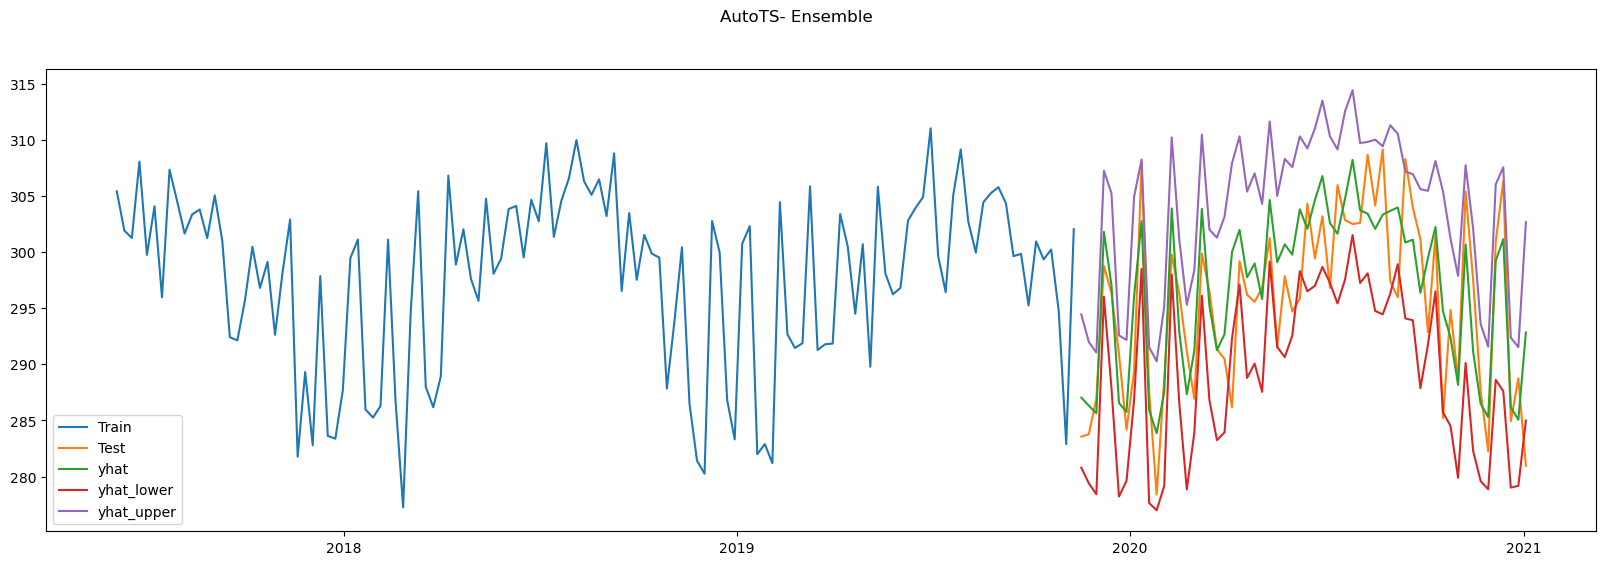

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Plot results
plt.figure(figsize=(20, 6))
plot_title = "AutoTS- Ensemble"
plt.plot(train_plot['Tpot (K)'][-128:], label='Train')
plt.plot(test_plot['Tpot (K)'], label='Test')
plt.plot(forecast_df['yhat'], label='yhat')
plt.plot(forecast_df['yhat_lower'], label='yhat_lower')
plt.plot(forecast_df['yhat_upper'], label='yhat_upper')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.legend(loc='best')
plt.suptitle(plot_title) # add a title
plt.savefig("{}.png".format(plot_title.replace("/", " per ").replace("**", "^"))) # save the figure
plt.show(block = False)

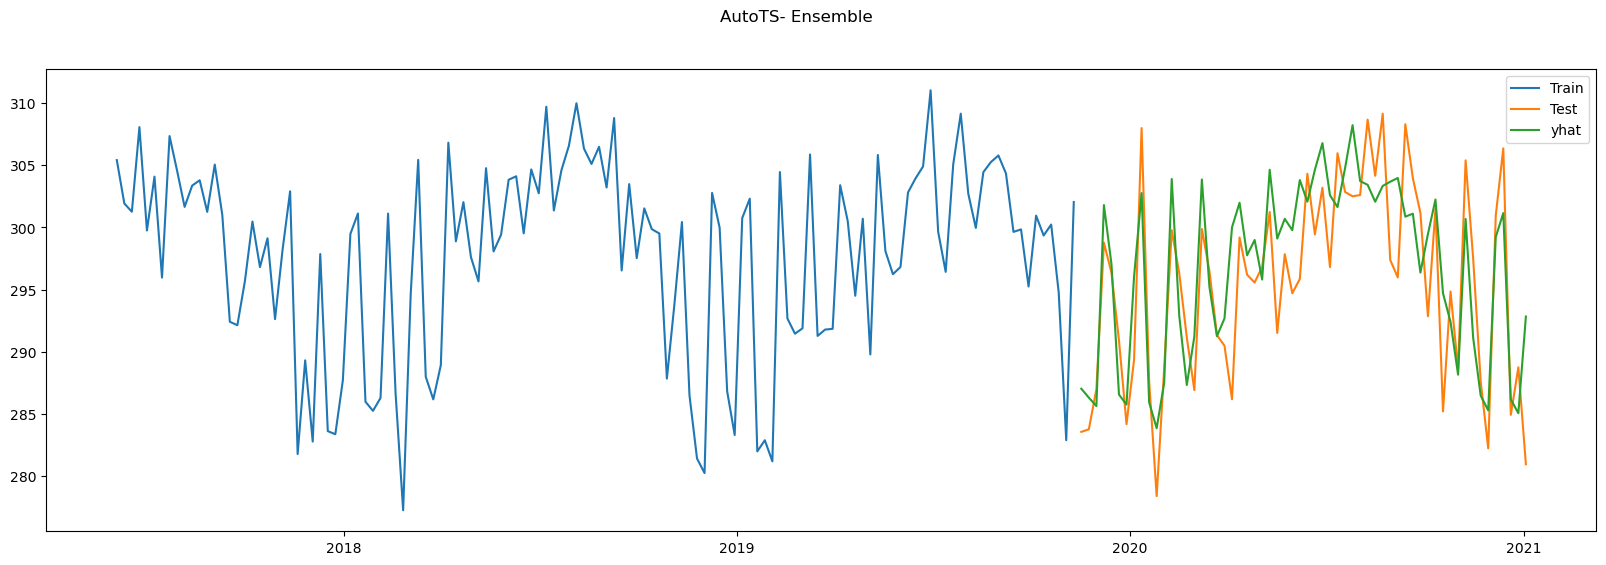

In [51]:
plt.figure(figsize=(20, 6))
plot_title = "AutoTS- Ensemble"
plt.plot(train_plot['Tpot (K)'][-128:], label='Train')
plt.plot(test_plot['Tpot (K)'], label='Test')
plt.plot(forecast_df['yhat'], label='yhat')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.legend(loc='best')
plt.suptitle(plot_title) # add a title
plt.savefig("{}.png".format(plot_title.replace("/", " per ").replace("**", "^"))) # save the figure
plt.show(block = False)

In [53]:
# Evaluation Metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE calculation
rmse = np.sqrt(mean_squared_error(test_plot['Tpot (K)'], forecast_df['yhat'][-60:]))

# MAPE calculation
mape = mean_absolute_percentage_error(test_plot['Tpot (K)'], forecast_df['yhat'][-60:])

print("Univariate Forecasting Metrics for AutoTS- Ensemble Model")
print('RMSE: ', rmse)
print('MAPE: ', mape)

Univariate Forecasting Metrics for AutoTS- Ensemble Model
RMSE:  4.849366009632439
MAPE:  1.361571976427725


### Effectiveness of the uncertainity level

In [54]:
# Create a boolean mask where True indicates that the true value is within the predicted interval
mask_uni_test = (test_plot['Tpot (K)'] >= forecast_df['yhat_lower']) & (test_plot['Tpot (K)'] <= forecast_df['yhat_upper'])

# Calculate the proportion of true values within the predicted interval
proportion_uni_test = round((mask_uni_test.sum() / len(mask_uni_test))*100,3)

print(f'Percentage of true values within the predicted interval for the test values: {proportion_uni_test}')


Percentage of true values within the predicted interval for the test values: 86.667
